In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('C://Users//LENOVO//Desktop//GEOIQ//singapore-residents-by-age-group-ethnic-group-and-sex-end-june-annual.csv')

In [3]:
df.head()

,year,level_1,level_2,value
0,1957,Total Residents,0 - 4 Years,264727
1,1957,Total Residents,5 - 9 Years,218097
2,1957,Total Residents,10 - 14 Years,136280
3,1957,Total Residents,15 - 19 Years,135679
4,1957,Total Residents,20 - 24 Years,119266


In [4]:
df.rename(columns={'level_1' : 'Ethnic', 'level_2' : 'Age', 'value': 'Pop'},inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20460 entries, 0 to 20459
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    20460 non-null  int64 
 1   Ethnic  20460 non-null  object
 2   Age     20460 non-null  object
 3   Pop     20460 non-null  object
dtypes: int64(1), object(3)
memory usage: 639.5+ KB


There are 4 fields.


year   -  Year of observation

Ethnic  -  Multi level(Combination of Ethnicity and Gender)

Age - Different age groups

Pop - Amount of Population

In [6]:
df.isnull().sum()

year      0
Ethnic    0
Age       0
Pop       0
dtype: int64

In [7]:
df.dtypes

year       int64
Ethnic    object
Age       object
Pop       object
dtype: object

'Pop' field has object datatype. We need to convert it into 'int' datatype in order to carryout arithmetic calculations.

In [8]:
df.Pop.astype('int')

ValueError: invalid literal for int() with base 10: 'na'

Error shows that there are custom null values 'na'.

In [9]:
df[df['Pop']=='na']

,year,Ethnic,Age,Pop
344,1958,Total Residents,70 - 74 Years,na
345,1958,Total Residents,75 - 79 Years,na
346,1958,Total Residents,80 - 84 Years,na
349,1958,Total Residents,75 Years & Over,na
350,1958,Total Residents,80 Years & Over,na
...,...,...,...,...
10867,1989,Other Ethnic Groups (Males),85 Years & Over,na
10883,1989,Other Ethnic Groups (Females),75 - 79 Years,na
10884,1989,Other Ethnic Groups (Females),80 - 84 Years,na
10888,1989,Other Ethnic Groups (Females),80 Years & Over,na


In [10]:
df.replace('na',np.nan,inplace=True)

In [11]:
df.Age.unique()

array(['0  -  4 Years', '5  -  9 Years', '10 - 14 Years', '15 - 19 Years',
       '20 - 24 Years', '25 - 29 Years', '30 - 34 Years', '35 - 39 Years',
       '40 - 44 Years', '45 - 49 Years', '50 - 54 Years', '55 - 59 Years',
       '60 - 64 Years', '65 - 69 Years', '70 - 74 Years', '75 - 79 Years',
       '80 - 84 Years', '65 Years & Over', '70 Years & Over',
       '75 Years & Over', '80 Years & Over', '85 Years & Over'],
      dtype=object)

In [12]:
df[df['Pop'].isnull()].Age.unique()

array(['70 - 74 Years', '75 - 79 Years', '80 - 84 Years',
       '75 Years & Over', '80 Years & Over', '85 Years & Over'],
      dtype=object)

We can drop all the rows containing 'na' values since this won't affect our analysis. We can effectively take the categories 
(0  -  4 Years), (5  -  9 Years), (10 - 14 Years), (15 - 19 Years), (20 - 24 Years), (25 - 29 Years), (30 - 34 Years), (35 - 39 Years), (40 - 44 Years), (45 - 49 Years), (50 - 54 Years), (55 - 59 Years), (60 - 64 Years) and (65 years & Over) for analysing ethnicity. This will cover our entire population.

In [13]:
filt = df[df.Age.isin(['65 - 69 Years','70 - 74 Years', '75 - 79 Years','80 - 84 Years','70 Years & Over','75 Years & Over', '80 Years & Over', '85 Years & Over'])].index

In [14]:
data = df.drop(filt)

In [20]:
data.Age.unique()

array(['0  -  4 Years', '5  -  9 Years', '10 - 14 Years', '15 - 19 Years',
       '20 - 24 Years', '25 - 29 Years', '30 - 34 Years', '35 - 39 Years',
       '40 - 44 Years', '45 - 49 Years', '50 - 54 Years', '55 - 59 Years',
       '60 - 64 Years', '65 Years & Over'], dtype=object)

# Exploratory data analysis

#  Population Trends

In [21]:
data.Ethnic.unique()

array(['Total Residents', 'Total Male Residents',
       'Total Female Residents', 'Total Malays', 'Total Male Malays',
       'Total Female Malays', 'Total Chinese', 'Total Male Chinese',
       'Total Female Chinese', 'Total Indians', 'Total Male Indians',
       'Total Female Indians', 'Other Ethnic Groups (Total)',
       'Other Ethnic Groups (Males)', 'Other Ethnic Groups (Females)'],
      dtype=object)

There are 4 Ethnic groups - Chinese,Malays,Indians and Others.

In [22]:
popu_data = data[data.Ethnic.isin(['Total Chinese','Total Malays','Total Indians','Other Ethnic Groups (Total)'])]

In [23]:
popu_data.Pop = popu_data.Pop.astype('int64')

In [24]:
popu_data.Ethnic.unique()

array(['Total Malays', 'Total Chinese', 'Total Indians',
       'Other Ethnic Groups (Total)'], dtype=object)

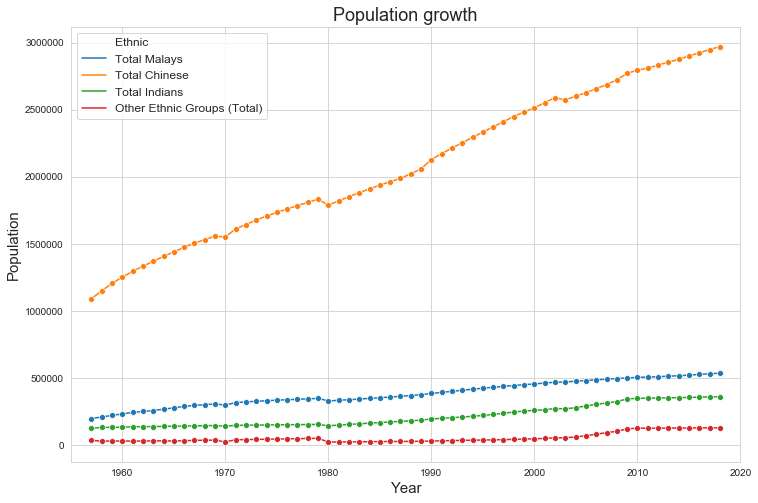

In [25]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.lineplot(x=popu_data.year,y=popu_data.Pop,hue=popu_data.Ethnic,marker ='o',estimator=sum,err_style=None,)
plt.xlabel('Year',size=15)
plt.ylabel('Population',size=15)
plt.xlim((1955,2020))
plt.title('Population growth',size=18)
plt.legend(prop={'size': 12})
plt.show()

From the above figure, it can be inferred that Chinese is the largest ethnic group in Singapore.

Chinese ethnicity has the highest growth rate around 2% while all the other groups show similar trend for the analysis period.

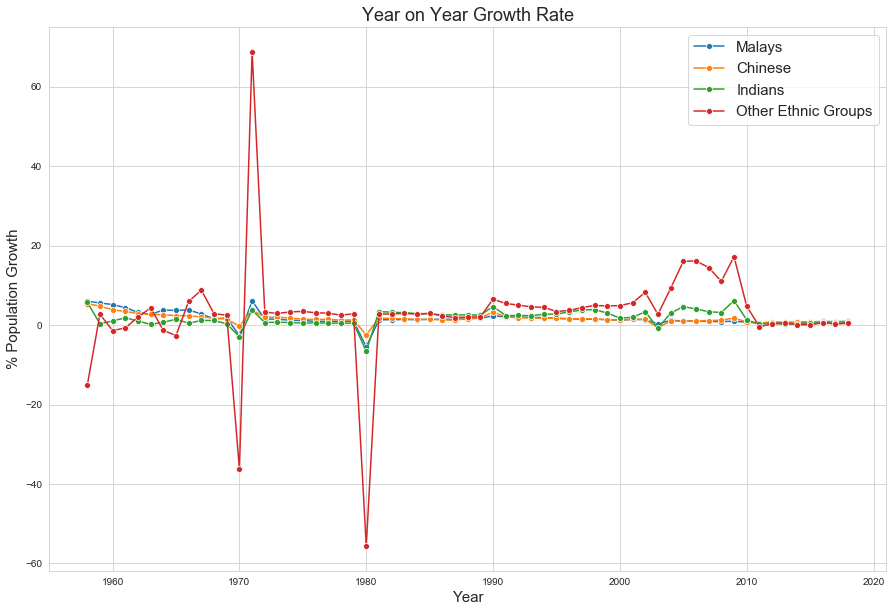

In [26]:
plt.rcParams['figure.figsize'] =15,10
for i in popu_data.Ethnic.unique():
    country = popu_data[popu_data.Ethnic==i]
    countrygroup = country.groupby(country.year).sum()
    country_pct = countrygroup.Pop.pct_change()*100
    growth = country_pct
    label={'Total Chinese' : 'Chinese','Total Malays' : 'Malays','Total Indians': 'Indians',
           'Other Ethnic Groups (Total)' : 'Other Ethnic Groups'}
    sns.lineplot(x=growth.index,y=growth,marker ='o',err_style=None,label=label[i])
    plt.xlabel('Year',size=15)
    plt.ylabel('% Population Growth',size = 15)
    plt.yscale('linear')
    plt.title('Year on Year Growth Rate',size = 18)
    plt.legend(prop={'size': 15})

'Other Ethnic groups' has faced fluctuations in growth rate over the years. They have recorded several peaks and deeps throughout.

In the last decade, growth rate of all the Ethnic groups have flattened to near zero.

In [27]:
x=pd.DataFrame()
for i in popu_data.Ethnic.unique():
    country = popu_data[popu_data.Ethnic==i]
    countrygroup = country.groupby(country.year).Pop.sum()
    x[i] = countrygroup

In [28]:
x['Malays']=''
x['Chinese']=''
x['Indians']=''
x['Other Ethnic Groups'] = ''

In [30]:
for i in x.index:
    x['Malays'].loc[i] = (x.loc[i,'Total Malays']/
                          (sum(x.loc[i,['Total Malays','Total Chinese','Total Indians','Other Ethnic Groups (Total)']])))*100
    x['Chinese'].loc[i] = (x.loc[i,'Total Chinese']/
                           (sum(x.loc[i,['Total Malays','Total Chinese','Total Indians','Other Ethnic Groups (Total)']])))*100
    x['Indians'].loc[i] = (x.loc[i,'Total Indians']/
                           (sum(x.loc[i,['Total Malays','Total Chinese','Total Indians','Other Ethnic Groups (Total)']])))*100
    x['Other Ethnic Groups'].loc[i] = (x.loc[i,'Other Ethnic Groups (Total)']/
                                       (sum(x.loc[i,['Total Malays','Total Chinese','Total Indians','Other Ethnic Groups (Total)']])))*100

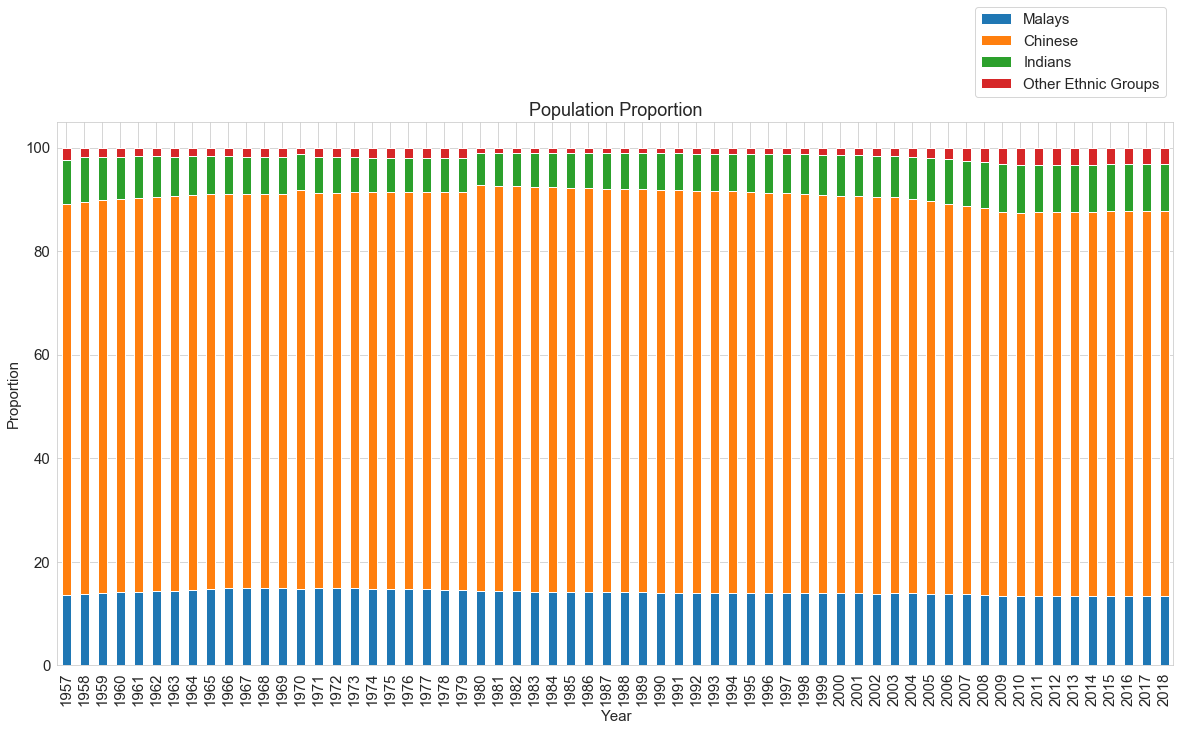

In [31]:
x[['Malays','Chinese','Indians','Other Ethnic Groups']].plot(kind='bar',figsize=(20,10), stacked=True)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Year',size = 15)
plt.ylabel('Proportion',size = 15)
plt.title('Population Proportion',size = 18)
plt.legend(loc='upper right', bbox_to_anchor=(1,1.225),prop={'size': 15})
plt.show()

Chinese Ethicnic group consitutes around 75% of total population. They form a sweeping majority.

Every 3 out of 4 people you come across in Singapore will be of Chinese ethnicity.

Malayas and Indians comprises of roughly 15% and 8% respectively. 
Other Ethnic group has a small 3% share.

#  Age Group and Gender

In [33]:
df

,year,Ethnic,Age,Pop
0,1957,Total Residents,0 - 4 Years,264727
1,1957,Total Residents,5 - 9 Years,218097
2,1957,Total Residents,10 - 14 Years,136280
3,1957,Total Residents,15 - 19 Years,135679
4,1957,Total Residents,20 - 24 Years,119266
...,...,...,...,...
20455,2018,Other Ethnic Groups (Females),65 Years & Over,3386
20456,2018,Other Ethnic Groups (Females),70 Years & Over,2087
20457,2018,Other Ethnic Groups (Females),75 Years & Over,1362
20458,2018,Other Ethnic Groups (Females),80 Years & Over,842


In [34]:
df.isna().sum()

year         0
Ethnic       0
Age          0
Pop       2460
dtype: int64

Drop null values

In [35]:
df_age = df.dropna()

In [36]:
df_age.Age.unique()
df_age.Ethnic.unique()

array(['Total Residents', 'Total Male Residents',
       'Total Female Residents', 'Total Malays', 'Total Male Malays',
       'Total Female Malays', 'Total Chinese', 'Total Male Chinese',
       'Total Female Chinese', 'Total Indians', 'Total Male Indians',
       'Total Female Indians', 'Other Ethnic Groups (Total)',
       'Other Ethnic Groups (Males)', 'Other Ethnic Groups (Females)'],
      dtype=object)

In [50]:
filtr = (df_age[df_age.Age.isin([ '65 Years & Over', '70 Years & Over',
       '75 Years & Over', '80 Years & Over'])].index)

In [51]:
df_age = df_age.drop(filtr)

In [52]:
age_data = df_age[(df_age.Ethnic == 'Total Residents') & ((df_age.year==1957) | (df_age.year==2018)) ]

In [53]:
age_data.Pop = age_data.Pop.astype('int64')

In [54]:
df

,year,Ethnic,Age,Pop
0,1957,Total Residents,0 - 4 Years,264727
1,1957,Total Residents,5 - 9 Years,218097
2,1957,Total Residents,10 - 14 Years,136280
3,1957,Total Residents,15 - 19 Years,135679
4,1957,Total Residents,20 - 24 Years,119266
...,...,...,...,...
20455,2018,Other Ethnic Groups (Females),65 Years & Over,3386
20456,2018,Other Ethnic Groups (Females),70 Years & Over,2087
20457,2018,Other Ethnic Groups (Females),75 Years & Over,1362
20458,2018,Other Ethnic Groups (Females),80 Years & Over,842


In [66]:
df_sex = df.dropna()
fil = (df_sex[df_sex.Age.isin([ '65 Years & Over', '70 Years & Over',
       '75 Years & Over', '80 Years & Over'])].index)
df_sex = df_sex.drop(fil)

In [67]:
sex_data = df_sex[((df_sex.Ethnic == 'Total Female Residents') | (df_sex.Ethnic == 'Total Male Residents')) &
                  ((df_age.year==1957) | (df_age.year==2018))]
sex_data.Pop = sex_data.Pop.astype('int64')

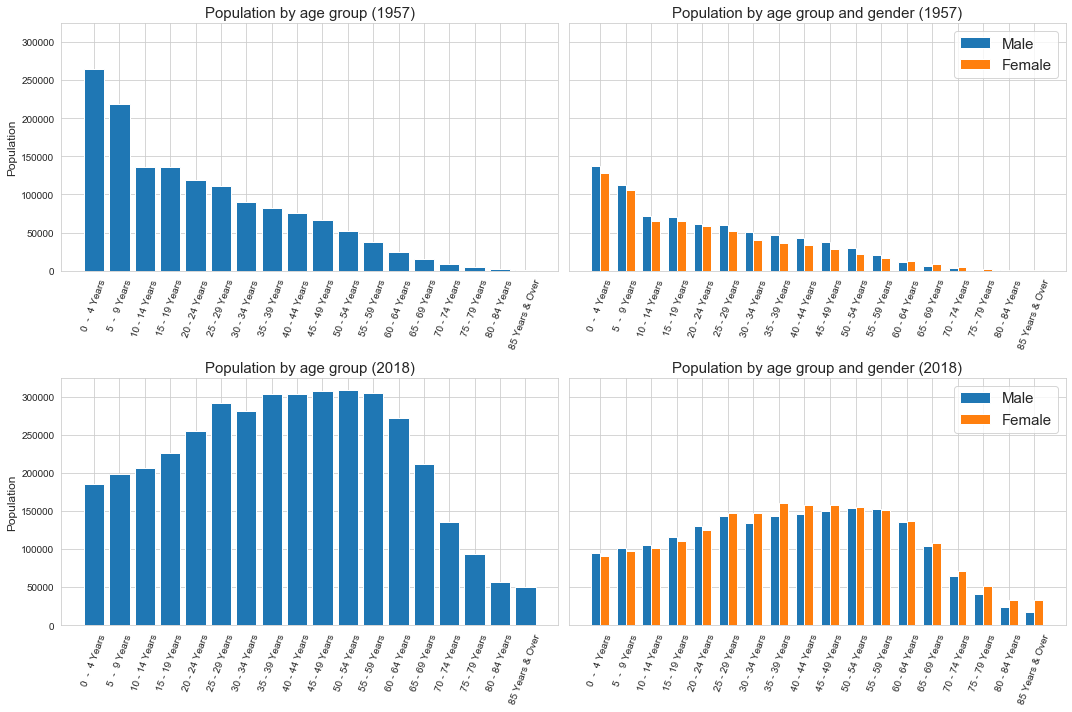

In [68]:
f, ax = plt.subplots(2,2,sharey=True)
ax[0,0].bar(age_data[age_data.year==1957].Age,age_data[age_data.year==1957].Pop)
ax[1,0].bar(age_data[age_data.year==2018].Age,age_data[age_data.year==2018].Pop)
ax[0,0].set_ylabel('Population',size =12)
ax[1,0].set_ylabel('Population',size =12)
ax[0,0].set_title('Population by age group (1957)',size =15)
ax[1,0].set_title('Population by age group (2018)',size =15)
ax[0,0].set_xticklabels(labels,rotation='70')
ax[1,0].set_xticklabels(labels,rotation='70')


labels = sex_data[sex_data.year==1957].Age.unique()
male_pop = sex_data[(sex_data.year==1957) & (sex_data.Ethnic=='Total Male Residents')].Pop
female_pop = sex_data[(sex_data.year==1957) & (sex_data.Ethnic=='Total Female Residents')].Pop
x = np.arange(len(labels))
width = 0.35
rects1 = ax[0,1].bar(x - width/2, male_pop, width, label='Male')
rects2 = ax[0,1].bar(x + width/2, female_pop, width, label='Female')


ax[0,1].set_title('Population by age group and gender (1957)',size =15)
ax[0,1].set_xticks(x)
ax[0,1].set_xticklabels(labels,rotation='70')

label = sex_data[sex_data.year==2018].Age.unique()
male_pop = sex_data[(sex_data.year==2018) & (sex_data.Ethnic=='Total Male Residents')].Pop
female_pop = sex_data[(sex_data.year==2018) & (sex_data.Ethnic=='Total Female Residents')].Pop
x = np.arange(len(label))
width = 0.35
rects3 = ax[1,1].bar(x - width/2, male_pop, width, label='Male')
rects4 = ax[1,1].bar(x + width/2, female_pop, width, label='Female')


ax[1,1].set_title('Population by age group and gender (2018)',size =15)
ax[1,1].set_xticks(x)
ax[1,1].set_xticklabels(labels,rotation='70')

f.tight_layout()
ax[0,1].legend(prop={'size': 15})
ax[1,1].legend(prop={'size': 15})
plt.show()

During the early period (1957), population is skewed towards the small age group. Low child sex ratio is also observed.

In current scenario, the trend has changed and more population is in mid and old age group. They are predominantly spread
across 35 to 60 years age group.
Low child sex ratio is still prevalent in Singapore. However, Gender disparity has reduced in the mid age group.

Also, high old age group is in accordance with the assertion that "Singapore has developed one of the finest Healthcare system and high life expectancy in the last century".

Note:-  Child sex ratio = No. of female child / No. of male child

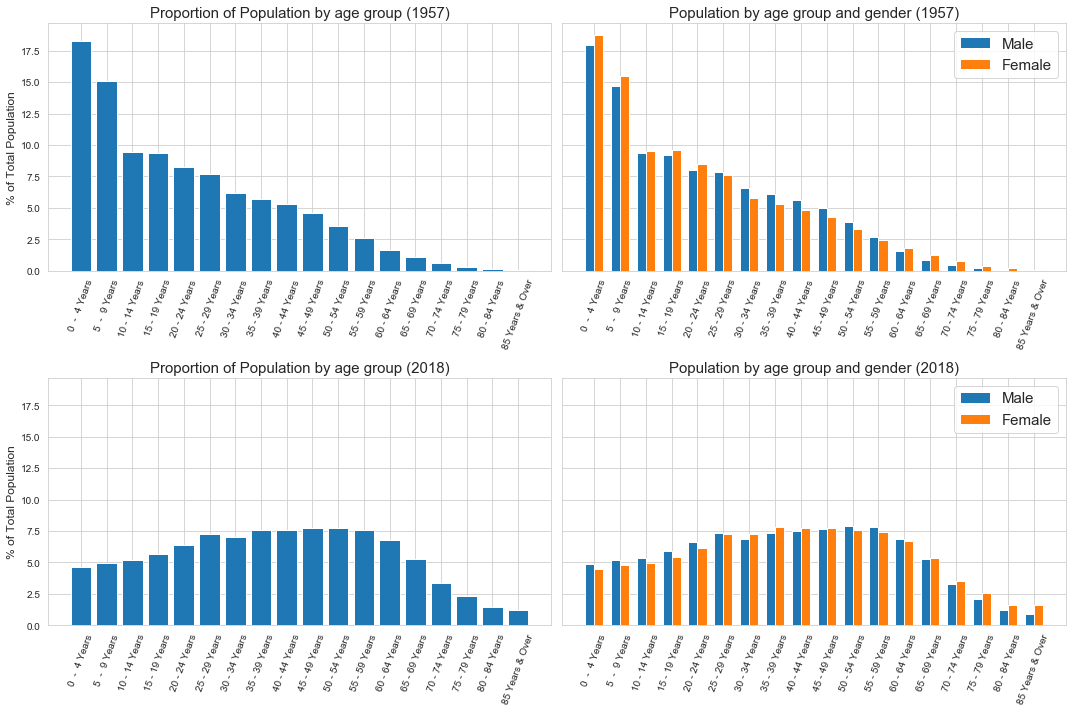

In [69]:
f, ax = plt.subplots(2,2,sharey=True)
ax[0,0].bar(age_data[age_data.year==1957].Age,((age_data[age_data.year==1957].Pop/
                                                age_data[age_data.year ==1957].Pop.sum()))*100)
ax[1,0].bar(age_data[age_data.year==2018].Age,((age_data[age_data.year==2018].Pop/
                                                age_data[age_data.year ==2018].Pop.sum()))*100)
ax[0,0].set_ylabel('% of Total Population',size =12)
ax[1,0].set_ylabel('% of Total Population',size =12)
ax[0,0].set_title('Proportion of Population by age group (1957)',size =15)
ax[1,0].set_title('Proportion of Population by age group (2018)',size =15)
ax[0,0].set_xticklabels(labels,rotation='70')
ax[1,0].set_xticklabels(labels,rotation='70')


labels = sex_data[sex_data.year==1957].Age.unique()
male_pop = (sex_data[(sex_data.year==1957) & (sex_data.Ethnic=='Total Male Residents')].Pop/
            sex_data[(sex_data.year==1957) & (sex_data.Ethnic=='Total Male Residents')].Pop.sum())*100
female_pop = (sex_data[(sex_data.year==1957) & (sex_data.Ethnic=='Total Female Residents')].Pop/
              sex_data[(sex_data.year==1957) & (sex_data.Ethnic=='Total Female Residents')].Pop.sum())*100
x = np.arange(len(labels))
width = 0.35
rects1 = ax[0,1].bar(x - width/2, male_pop, width, label='Male')
rects2 = ax[0,1].bar(x + width/2, female_pop, width, label='Female')


ax[0,1].set_title('Population by age group and gender (1957)',size =15)
ax[0,1].set_xticks(x)
ax[0,1].set_xticklabels(labels,rotation='70')

label = sex_data[sex_data.year==2018].Age.unique()
male_pop = (sex_data[(sex_data.year==2018) & (sex_data.Ethnic=='Total Male Residents')].Pop/
            sex_data[(sex_data.year==2018) & (sex_data.Ethnic=='Total Male Residents')].Pop.sum())*100
female_pop = (sex_data[(sex_data.year==2018) & (sex_data.Ethnic=='Total Female Residents')].Pop/
              sex_data[(sex_data.year==2018) & (sex_data.Ethnic=='Total Female Residents')].Pop.sum())*100
x = np.arange(len(label))
width = 0.35
rects3 = ax[1,1].bar(x - width/2, male_pop, width, label='Male')
rects4 = ax[1,1].bar(x + width/2, female_pop, width, label='Female')

ax[1,1].set_title('Population by age group and gender (2018)',size =15)
ax[1,1].set_xticks(x)
ax[1,1].set_xticklabels(labels,rotation='70')

f.tight_layout()
ax[0,1].legend(prop={'size': 15})
ax[1,1].legend(prop={'size': 15})
plt.show()


The proprtion of younger age group which was around 17% in 1957 has shrunk to 5% in 2018. It is vivid to note that Family planning programme was adopted in later half of 1960's.


# Ethnic Group and Gender

In [70]:
df

,year,Ethnic,Age,Pop
0,1957,Total Residents,0 - 4 Years,264727
1,1957,Total Residents,5 - 9 Years,218097
2,1957,Total Residents,10 - 14 Years,136280
3,1957,Total Residents,15 - 19 Years,135679
4,1957,Total Residents,20 - 24 Years,119266
...,...,...,...,...
20455,2018,Other Ethnic Groups (Females),65 Years & Over,3386
20456,2018,Other Ethnic Groups (Females),70 Years & Over,2087
20457,2018,Other Ethnic Groups (Females),75 Years & Over,1362
20458,2018,Other Ethnic Groups (Females),80 Years & Over,842


In [71]:
ethnic_gen= df.dropna()

In [72]:
ethnic_gen = ethnic_gen[ethnic_gen.Ethnic.isin(['Total Male Malays',
       'Total Female Malays', 'Total Male Chinese',
       'Total Female Chinese', 'Total Male Indians',
       'Total Female Indians','Other Ethnic Groups (Males)', 'Other Ethnic Groups (Females)'])]

In [73]:
ethnic_gen = ethnic_gen[ethnic_gen.Age.isin(['0  -  4 Years', '5  -  9 Years', '10 - 14 Years', '15 - 19 Years',
       '20 - 24 Years', '25 - 29 Years', '30 - 34 Years', '35 - 39 Years',
       '40 - 44 Years', '45 - 49 Years', '50 - 54 Years', '55 - 59 Years',
       '60 - 64 Years', '65 - 69 Years', '70 - 74 Years', '75 - 79 Years',
       '80 - 84 Years', '85 Years & Over'])]
ethnic_gen.Pop =ethnic_gen.Pop.astype('int64')
ethnic_gen.Ethnic.replace('Other Ethnic Groups (Females)','Other Ethnic Groups_Females',inplace=True)
ethnic_gen.Ethnic.replace('Other Ethnic Groups (Males)','Other Ethnic Groups_Males',inplace=True)

In [74]:
ethnic_gen_df = pd.DataFrame()
for i in ethnic_gen.Ethnic.unique():
    g = ethnic_gen[ethnic_gen.Ethnic==i]
    ethnic_gen_group = g.groupby(g.year).Pop.sum()
    ethnic_gen_df[i] = ethnic_gen_group

In [75]:
ethnic_gen_df

,Total Male Malays,Total Female Malays,Total Male Chinese,Total Female Chinese,Total Male Indians,Total Female Indians,Other Ethnic Groups_Males,Other Ethnic Groups_Females
year,,,,,,,,
1957,103249,93810,555663,534933,85988,38096,17860,16330
1958,108300,98900,580800,555000,88700,42100,14300,14100
1959,114400,104500,607700,582200,87700,43600,14700,14500
1960,120200,110200,630900,604500,87700,45100,14300,14400
1961,124800,115900,652300,625900,88400,46800,14100,14400
...,...,...,...,...,...,...,...,...
2014,257036,259621,1403927,1470453,181359,171662,60088,66593
2015,259108,261815,1415303,1484704,182304,172648,59913,66895
2016,261564,264324,1425244,1497928,182935,173941,59783,67840


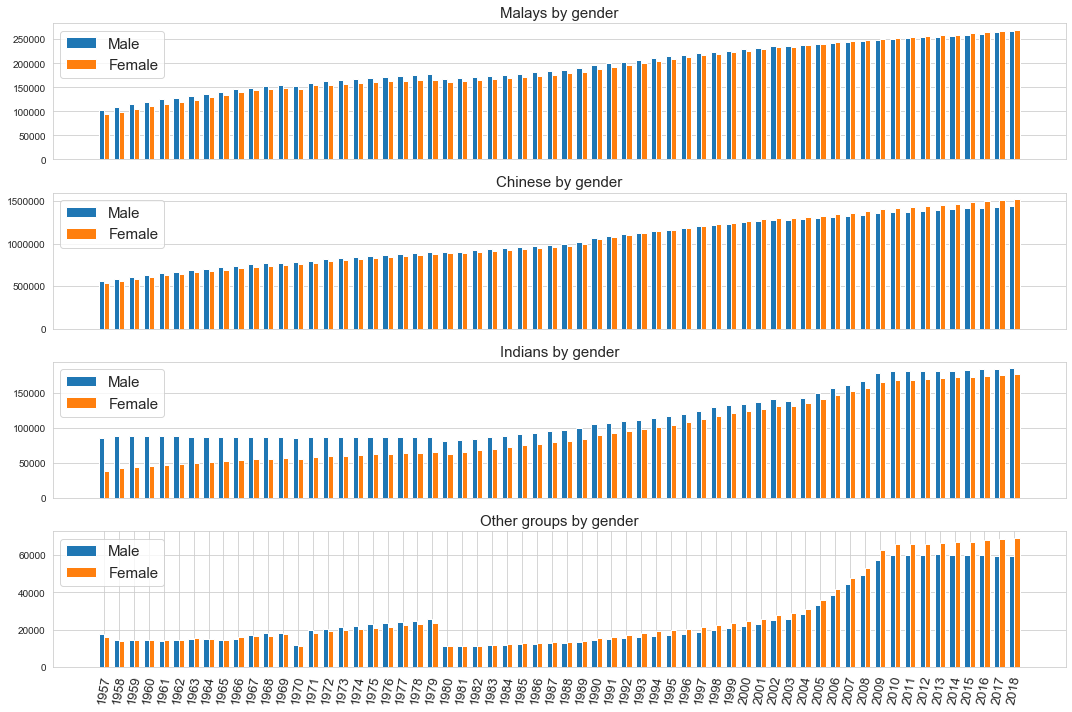

In [76]:
labels = ethnic_gen_df.index
x = np.arange(len(labels))
width = 0.35

Total_Male_Malays = ethnic_gen_df['Total Male Malays']
Total_Female_Malays = ethnic_gen_df['Total Female Malays']

Total_Male_Chinese = ethnic_gen_df['Total Male Chinese']
Total_Female_Chinese = ethnic_gen_df['Total Female Chinese']

Total_Male_Indians = ethnic_gen_df['Total Male Indians']
Total_Female_Indians = ethnic_gen_df['Total Female Indians']

Other_Ethnic_Groups_Males = ethnic_gen_df['Other Ethnic Groups_Males']
Other_Ethnic_Groups_Female = ethnic_gen_df['Other Ethnic Groups_Females']

fig, [ax1,ax2,ax3,ax4] = plt.subplots(4,1)
ax1.bar(x - width/2, Total_Male_Malays, width, label='Male')
ax1.bar(x + width/2, Total_Female_Malays, width, label='Female')
ax1.legend(prop={'size': 15})
ax1.set_title('Malays by gender',size =15)
ax1.xaxis.set_visible(False)


ax2.bar(x - width/2, Total_Male_Chinese, width, label='Male')
ax2.bar(x + width/2, Total_Female_Chinese, width, label='Female')
ax2.legend(prop={'size': 15})
ax2.xaxis.set_visible(False)
ax2.set_title('Chinese by gender',size =15)


ax3.bar(x - width/2, Total_Male_Indians, width, label='Male')
ax3.bar(x + width/2, Total_Female_Indians, width, label='Female')
ax3.legend(prop={'size': 15})
ax3.xaxis.set_visible(False)
ax3.set_title('Indians by gender',size =15)


ax4.bar(x - width/2, Other_Ethnic_Groups_Males, width, label='Male')
ax4.bar(x + width/2, Other_Ethnic_Groups_Female, width, label='Female')
ax4.legend(prop={'size': 15})
ax4.set_xticks(x)
ax4.set_xticklabels(labels,rotation='80',size =13)
ax4.set_title('Other groups by gender',size =15)
fig.tight_layout()

plt.show()

It can be noticed that Indian ethnicity has high gender disparity. However, Female population among Indian ethncity is catching up the in present.

For Chinese, Malays and other Ethnic groups, female population is higher than their male counterparts in the last decade.